## 영화 리뷰를 사용한 텍스트 분류

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
print(np.__version__)

2.4.0
1.19.2


2. 데이터
  - 영화 리뷰 텍스트 데이터
  - 글정, 부정 분류
  - 인터넷 영화 데이터베이스에서 수집한 50,000개 데이터
  - 훈련용(25,000개), 테스트용(25,000개)

In [4]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)


17465344/17464789 [==============================] - 2s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\691\.conda\envs\study\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\691\.conda\envs\study\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

3. 데이터 탐색

In [6]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data),len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
len(train_data[0]),len(train_data[1])

(218, 189)

In [10]:
train_labels[0]

1

In [9]:
train_labels[1]

0

4. 정수를 단어로 변환하기

In [28]:
#imdb.get_word_index()

In [12]:
#단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

In [ ]:
# word_index_01 = word_index.copy #비교를 위해 넣으

In [16]:
# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_index = {k:(v+3) for k,v in word_index.items()} #새로운 인덱스 만듦

In [15]:
# for k,v in word_index.items():
#     print("k = ",k)
#     print("v = ",v)
#     break

k =  fawn
v =  34701


In [27]:
#word_index

In [17]:
len(word_index)

88584

In [19]:
# 딕셔너리에 데이터 추가 시키기 위함
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 #unknown
word_index["<UNUSED>"] = 3

#value 와 key의 자리를 변환
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [26]:
#reverse_word_index

In [32]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [33]:
#reverse_word_index.get(30571)

In [34]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

5. 데이터 준비

In [80]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                      value=word_index["<PAD>"],
                                                      padding="post",
                                                      maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index["<PAD>"],
                                                      padding="post",
                                                      maxlen=256)

In [81]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [82]:
print(train_data[0])

[   1  591  202   14   31    6  717   10   10    2    2    5    4  360
    7    4  177 5760  394  354    4  123    9 1035 1035 1035   10   10
   13   92  124   89  488 7944  100   28 1668   14   31   23   27 7479
   29  220  468    8  124   14  286  170    8  157   46    5   27  239
   16  179    2   38   32   25 7944  451  202   14    6  717    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

6. 모델 구성

In [83]:
# 입력 크기는 영화 리뷰 데이셋에 적용된 어휘 사전의 크기입니다.(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [45]:
# input_shape = (2,4,1)
# x = tf.random.normal(input_shape)
# y = tf.keras.layers.GlobalAveragePooling1D()
# print(y.shape)

AttributeError: 'GlobalAveragePooling1D' object has no attribute 'shape'

In [84]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics=["accuracy"])

7. 검증 세트 만들기
  - train_data에서 validation 테이터를 만듦

In [85]:
x_val = train_data[:10000] #데이터 끊어오는 방법
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

8. 모델 훈련

In [86]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/40
30/30 [==============================] - 0s 17ms/step - loss: 0.6929 - accuracy: 0.5046 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6928 - accuracy: 0.5040 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 5/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6924 - accuracy: 0.5107 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 6/40
30/30 [==============================] - 1s 17ms/step - loss: 0.6915 - accuracy: 0.5146 - val_loss: 0.6935 - val_accuracy: 0.4944
Epoch 7/40
30/30 [==============================] - 0s 17ms/step - loss: 0.6901 - accuracy: 0.5677 - val_loss: 0.6939 - val_accuracy: 0.4953
Epoch 8/40
30

9. 모델 평가

In [87]:
results = model.evaluate(test_data, test_labels, verbose =2)
print(results)

782/782 - 0s - loss: 1.0576 - accuracy: 0.5006
[1.0575810670852661, 0.5005599856376648]


In [70]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

10. 정확도와 손실 그래프 그리기

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

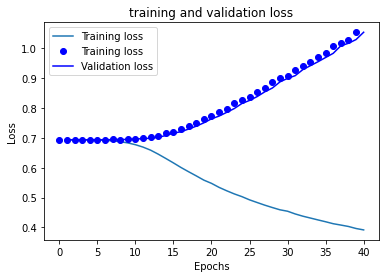

In [89]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)

# "bo"는 "파란색 점"입니다.
plt.plot(epochs, loss, val_loss, "bo", label= "Training loss")

# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# plt.show()

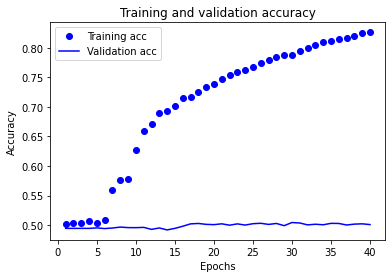

In [90]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.show()